<center><span style="font-size:36px; color:pink; font-weight:bold">Classification des visages selon le genre, la race et estimation de l'âge</span></center>





La reconnaissance d'âge, de genre et de race à partir d'images est un domaine de recherche en intelligence artificielle qui a connu des avancées significatives ces dernières années grâce à l'utilisation de réseaux de neurones convolutifs (CNN). Les CNN sont des architectures de réseau de neurones spécialement conçues pour l'analyse d'images et qui ont montré des performances exceptionnelles dans une variété de tâches liées à la vision par ordinateur.

Dans le contexte de la reconnaissance d'âge, de genre et de race à partir d'images, les CNN peuvent être utilisés pour extraire des caractéristiques significatives de l'image, telles que la texture de la peau, la forme du visage et la couleur des yeux, et pour les utiliser pour prédire l'âge, le genre et la race. Les algorithmes peuvent être entraînés sur des ensembles de données volumineux et diversifiés pour améliorer la précision des prédictions.

<img src="https://www.age-platform.eu/sites/default/files/UN-Brief-Age%26Gender-image.png">



<div style="background-color: #E6E6FA; text-align:center; padding: 10px; border-radius: 25px;">
  <h1 style="color:pink">Importation des bibliotheques
</h1>
</div>

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

    



<div style="background-color: #E6E6FA; text-align:center; padding: 10px; border-radius: 25px;">
  <h1 style="color:pink">Data understanding
</h1>
</div>

In [2]:
BASE_DIR = '../input/utkface-new/UTKFace/'

In [3]:
image_paths = []
age_labels = []
gender_labels = []
race_labels=[]
for filename in tqdm(os.listdir(BASE_DIR)):
    
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    if (len(temp)>=4):
        age = int(temp[0])
        gender = int(temp[1])
        race = int(temp[2])
        image_paths.append(image_path)
        age_labels.append(age)
        gender_labels.append(gender)   
        race_labels.append(race)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [4]:
df = pd.DataFrame()
df['image'], df['age'], df['gender'] ,df['race'] = image_paths, age_labels, gender_labels,race_labels
df.head()

image  age  gender  race
0  ../input/utkface-new/UTKFace/26_0_2_2017010402...   26       0     2
1  ../input/utkface-new/UTKFace/22_1_1_2017011223...   22       1     1
2  ../input/utkface-new/UTKFace/21_1_3_2017010500...   21       1     3
3  ../input/utkface-new/UTKFace/28_0_0_2017011718...   28       0     0
4  ../input/utkface-new/UTKFace/17_1_4_2017010322...   17       1     4

In [5]:
df =df.sample(10000)
df= df.reset_index(drop=True)
df.head()

image  age  gender  race
0  ../input/utkface-new/UTKFace/46_1_0_2017010900...   46       1     0
1  ../input/utkface-new/UTKFace/18_1_0_2017010921...   18       1     0
2  ../input/utkface-new/UTKFace/1_0_3_20161220220...    1       0     3
3  ../input/utkface-new/UTKFace/26_1_1_2017011221...   26       1     1
4  ../input/utkface-new/UTKFace/1_1_0_20161219212...    1       1     0

In [6]:
gender_dict = {0:'Male', 1:'Female'}
race_dict = {0:"0",1:"1",2:"2",3:"3",4:"4"}

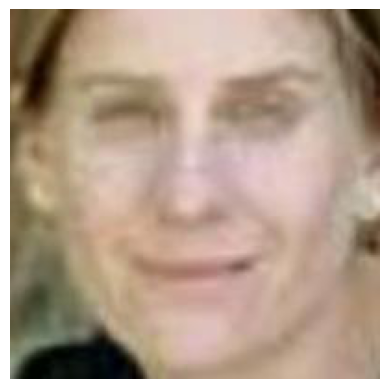

In [7]:
from PIL import Image
img = Image.open(df['image'][0])
plt.axis('off')
plt.imshow(img);

<AxesSubplot:xlabel='age', ylabel='Density'>

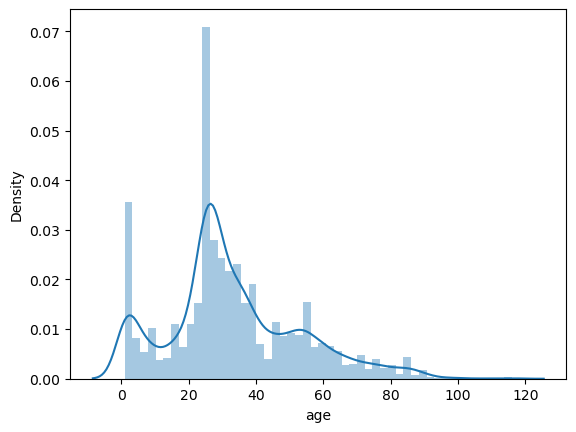

In [8]:
sns.distplot(df['age'])

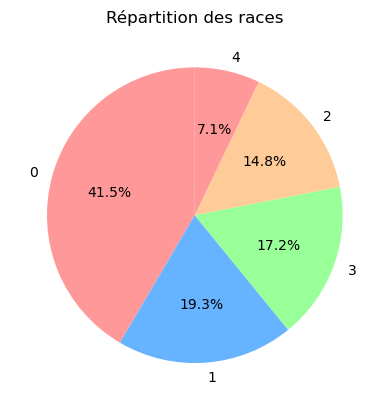

In [9]:
import matplotlib.pyplot as plt

# Créer une liste de couleurs pour chaque secteur du graphique
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Générer les données de répartition des races dans le DataFrame df
race_counts = df['race'].value_counts()

# Créer le graphique en secteurs
plt.pie(race_counts, labels=race_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)

# Ajouter un titre au graphique
plt.title('Répartition des races')

# Afficher le graphique
plt.show()


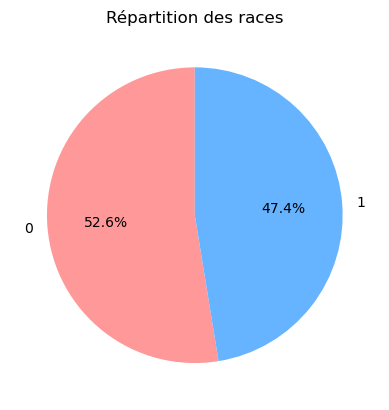

In [10]:
import matplotlib.pyplot as plt

# Créer une liste de couleurs pour chaque secteur du graphique
colors = ['#ff9999','#66b3ff']

# Générer les données de répartition des races dans le DataFrame df
race_counts = df['gender'].value_counts()

# Créer le graphique en secteurs
plt.pie(race_counts, labels=race_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)

# Ajouter un titre au graphique
plt.title('Répartition des races')

# Afficher le graphique
plt.show()


In [11]:
df.describe()

age        gender          race
count  10000.000000  10000.000000  10000.000000
mean      33.121500      0.474300      1.290100
std       19.874678      0.499364      1.344739
min        1.000000      0.000000      0.000000
25%       23.000000      0.000000      0.000000
50%       29.000000      0.000000      1.000000
75%       45.000000      1.000000      2.000000
max      116.000000      1.000000      4.000000

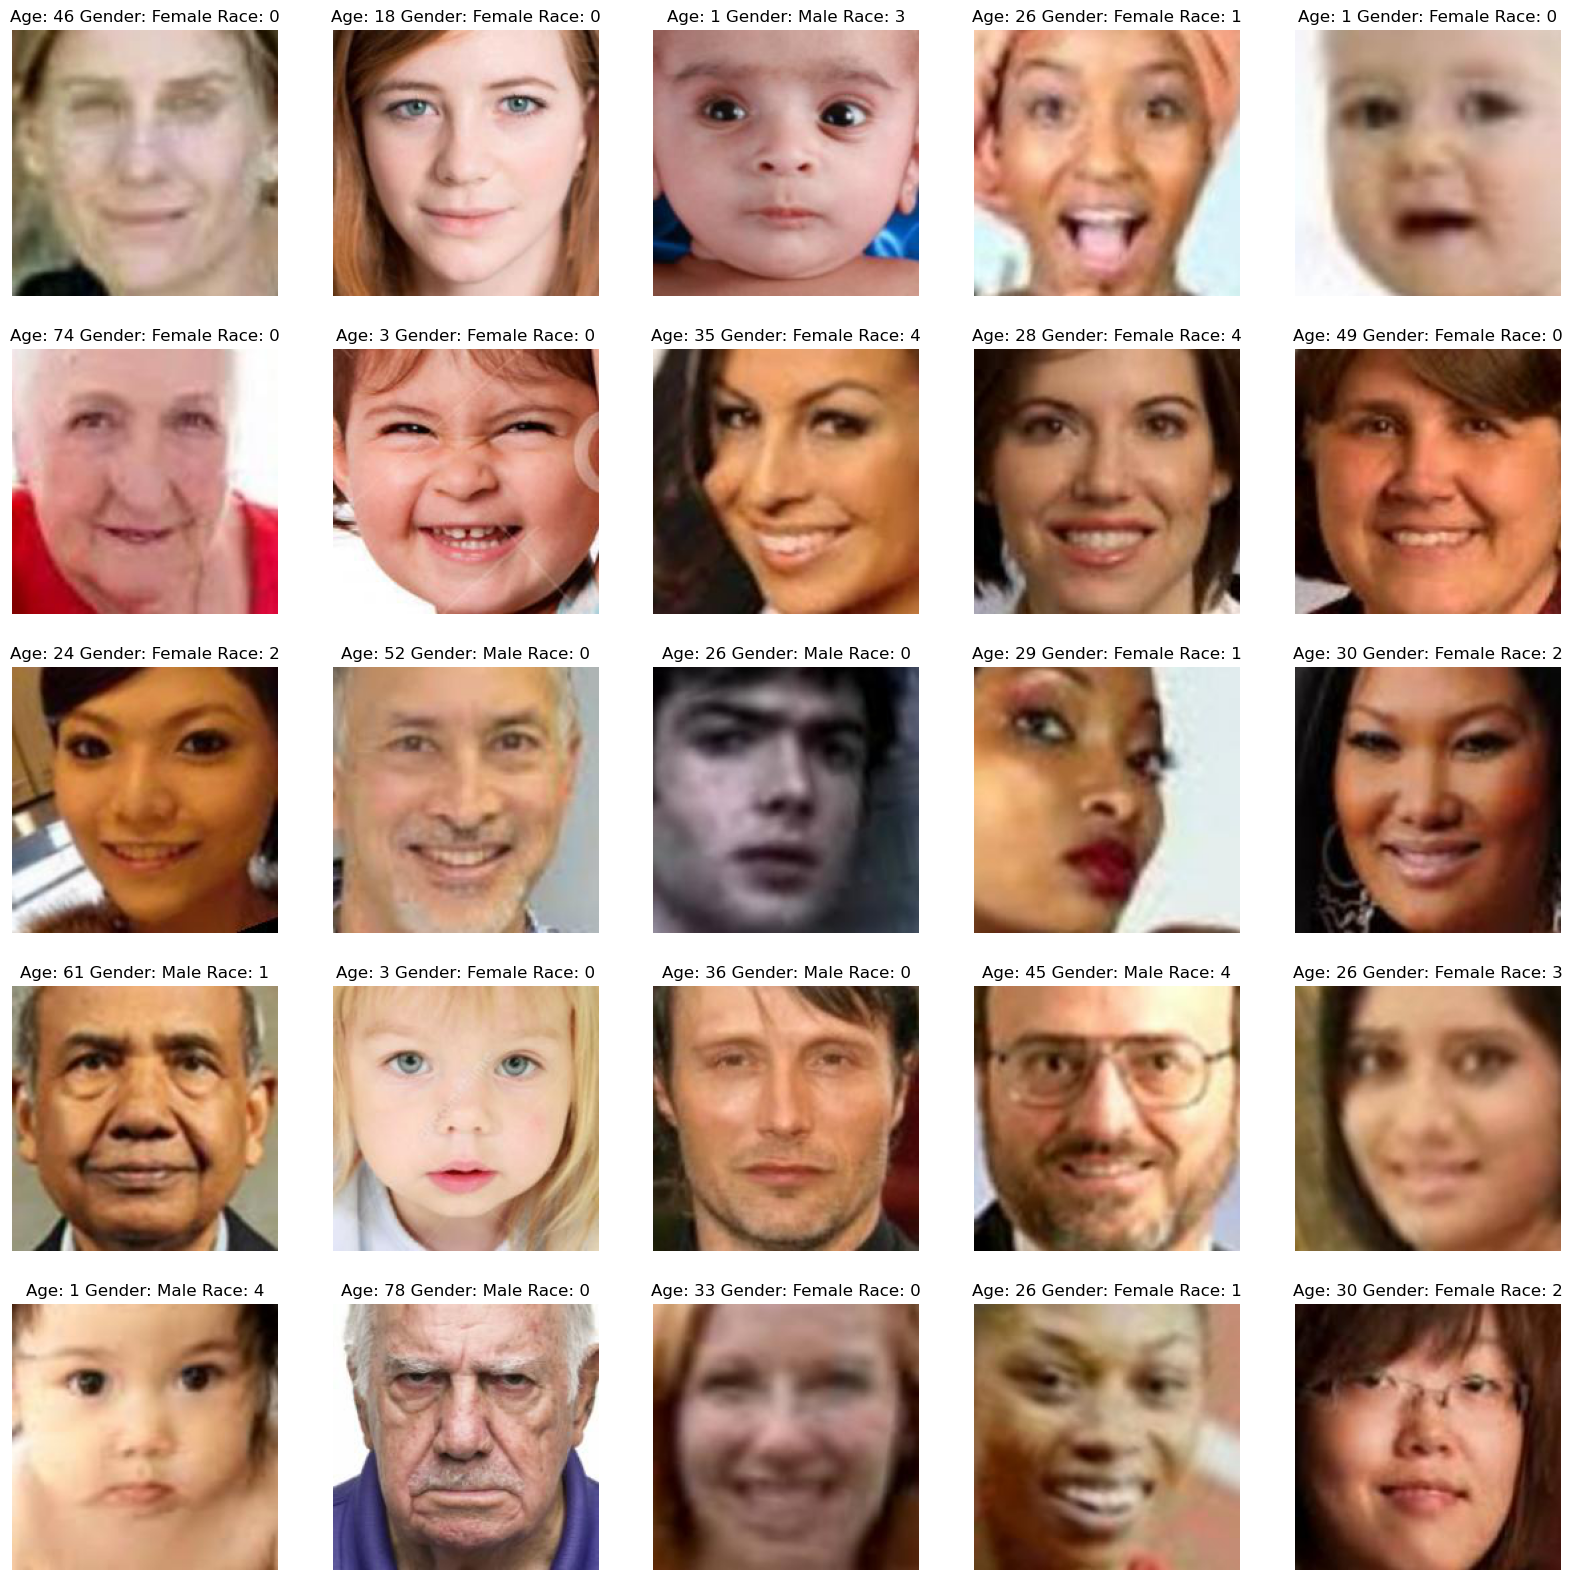

In [12]:
plt.figure(figsize=(20, 20))
files = df.iloc[0:25]

for index, file, age, gender,race in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]} Race: {race}")
    plt.axis('off')

In [13]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # ignore this step if using RGB
    features = features.reshape(len(features), 128, 128, 1)
    return features
X = extract_features(df['image'])

  0%|          | 0/10000 [00:00<?, ?it/s]

In [14]:


X = extract_features(df['image'])

  0%|          | 0/10000 [00:00<?, ?it/s]

In [15]:
X.shape

(10000, 128, 128, 1)

In [16]:
# normalize the images
X = X/255.0

In [17]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])
y_race = np.array(df['race'])

In [18]:
input_shape = (128, 128, 1)



<div style="background-color: #E6E6FA; text-align:center; padding: 10px; border-radius: 25px;">
  <h1 style="color:pink">CNN sur les images colorées</h1>
</div>

In [18]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
from PIL import Image

input_shape = (128, 128, 3)

    
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # ignore this step if using RGB
    #features = features.reshape(len(features), 128, 128, 3)
    return features

X = extract_features(df['image'])
X = X/255.0


  0%|          | 0/10000 [00:00<?, ?it/s]

In [19]:
X.shape

(10000, 128, 128, 3)

In [57]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])
y_race = np.array(df['race'])
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)
dense_3 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)
dropout_3 = Dropout(0.3) (dense_3)

gender_out = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
age_out = Dense(1, activation='relu', name='age_out') (dropout_2)
race_out = Dense(1, activation='softmax', name='race_out') (dropout_3)

model = Model(inputs=[inputs], outputs=[gender_out, age_out, race_out])

#model.compile(loss=['binary_crossentropy', 'mae', 'c

model.compile(loss=['binary_crossentropy', 'mae', 'categorical_crossentropy'], optimizer='adam', metrics=['accuracy'])


model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_8 (Conv2D)              (None, 126, 126, 32  896         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_8 (MaxPooling2D)  (None, 63, 63, 32)  0           ['conv2d_8[0][0]']               
                                                                                            

In [24]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train_val, X_test, y_gender_train_val, y_gender_test, y_age_train_val, y_age_test, y_race_train_val, y_race_test = train_test_split(X, y_gender, y_age, y_race)

# Split the training and validation sets
X_train, X_val, y_gender_train, y_gender_val, y_age_train, y_age_val, y_race_train, y_race_val = train_test_split(X_train_val, y_gender_train_val, y_age_train_val, y_race_train_val)
history_2 = model.fit(x=X_train, y=[y_gender_train, y_age_train, y_race_train], batch_size=32, epochs=10, validation_data=(X_val, [y_gender_val, y_age_val, y_race_val]))


Epoch 1/10
176/176 [==============================] - 135s 764ms/step - loss: 1535.1924 - gender_out_loss: 1396.3960 - age_out_loss: 138.7967 - race_out_loss: 0.0000e+00 - gender_out_accuracy: 0.5285 - age_out_accuracy: 0.0000e+00 - race_out_accuracy: 0.1890 - val_loss: 34.3896 - val_gender_out_loss: 0.6904 - val_age_out_loss: 33.6992 - val_race_out_loss: 0.0000e+00 - val_gender_out_accuracy: 0.5328 - val_age_out_accuracy: 0.0000e+00 - val_race_out_accuracy: 0.1947
Epoch 2/10
176/176 [==============================] - 128s 728ms/step - loss: 34.1233 - gender_out_loss: 0.6915 - age_out_loss: 33.4318 - race_out_loss: 0.0000e+00 - gender_out_accuracy: 0.5282 - age_out_accuracy: 0.0000e+00 - race_out_accuracy: 0.1890 - val_loss: 34.3895 - val_gender_out_loss: 0.6902 - val_age_out_loss: 33.6992 - val_race_out_loss: 0.0000e+00 - val_gender_out_accuracy: 0.5328 - val_age_out_accuracy: 0.0000e+00 - val_race_out_accuracy: 0.1947
Epoch 3/10
176/176 [==============================] - 128s 728ms/s

Original Gender: Male Original Age: 52
1/1 [==============================] - 1s 1s/step
Predicted Gender: Male
Predicted Age: 63
Predicted Race: 1


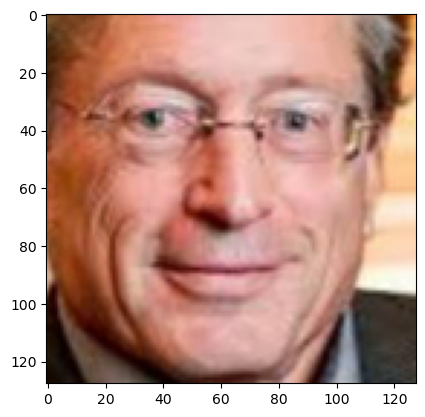

In [40]:
#from keras.models import load_model

image_index=100
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])

# Make predictions on new data
pred_gender, pred_age, pred_race = model.predict(X[image_index].reshape(1, 128, 128, 3))

# Print the predicted gender, age, and race
print("Predicted Gender:", gender_dict[round(pred_gender[0][0])])
print("Predicted Age:", round(pred_age[0][0]))
print("Predicted Race:", race_dict[round(pred_race[0][0])])
plt.imshow(X[image_index].reshape(128, 128,3), cmap='gray')


Original Gender: Male Original Age: 27
1/1 [==============================] - 0s 101ms/step
Predicted Gender: Male
Predicted Age: 0
Predicted Race: 1


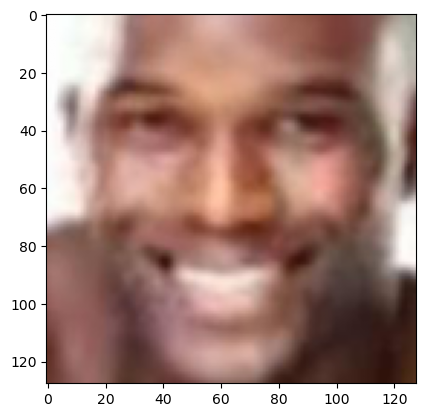

In [55]:
#from keras.models import load_model

# Load the saved model
image_index=100
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])

# Make predictions on new data
pred_gender, pred_age, pred_race = model.predict(X[image_index].reshape(1, 128, 128, 3))

# Print the predicted gender, age, and race
print("Predicted Gender:", gender_dict[round(pred_gender[0][0])])
print("Predicted Age:", round(pred_age[0][0]))
print("Predicted Race:", race_dict[round(pred_race[0][0])])
plt.imshow(X[image_index].reshape(128, 128,3), cmap='gray')


Original Gender: Female Original Age: 30
1/1 [==============================] - 0s 23ms/step
Predicted Gender: Male
Predicted Age: 0
Predicted Race: 1


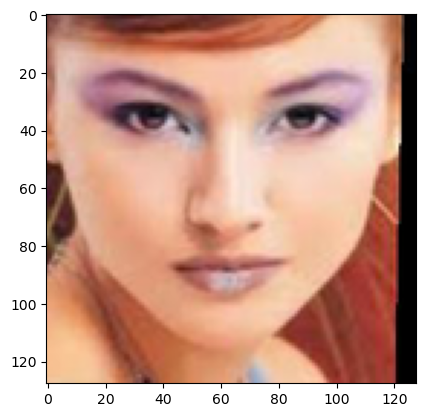

In [56]:
#from keras.models import load_model

# Load the saved model
image_index=10
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])

# Make predictions on new data
pred_gender, pred_age, pred_race = model.predict(X[image_index].reshape(1, 128, 128, 3))

# Print the predicted gender, age, and race
print("Predicted Gender:", gender_dict[round(pred_gender[0][0])])
print("Predicted Age:", round(pred_age[0][0]))
print("Predicted Race:", race_dict[round(pred_race[0][0])])
plt.imshow(X[image_index].reshape(128, 128,3), cmap='gray')


1/1 [==============================] - 0s 24ms/step


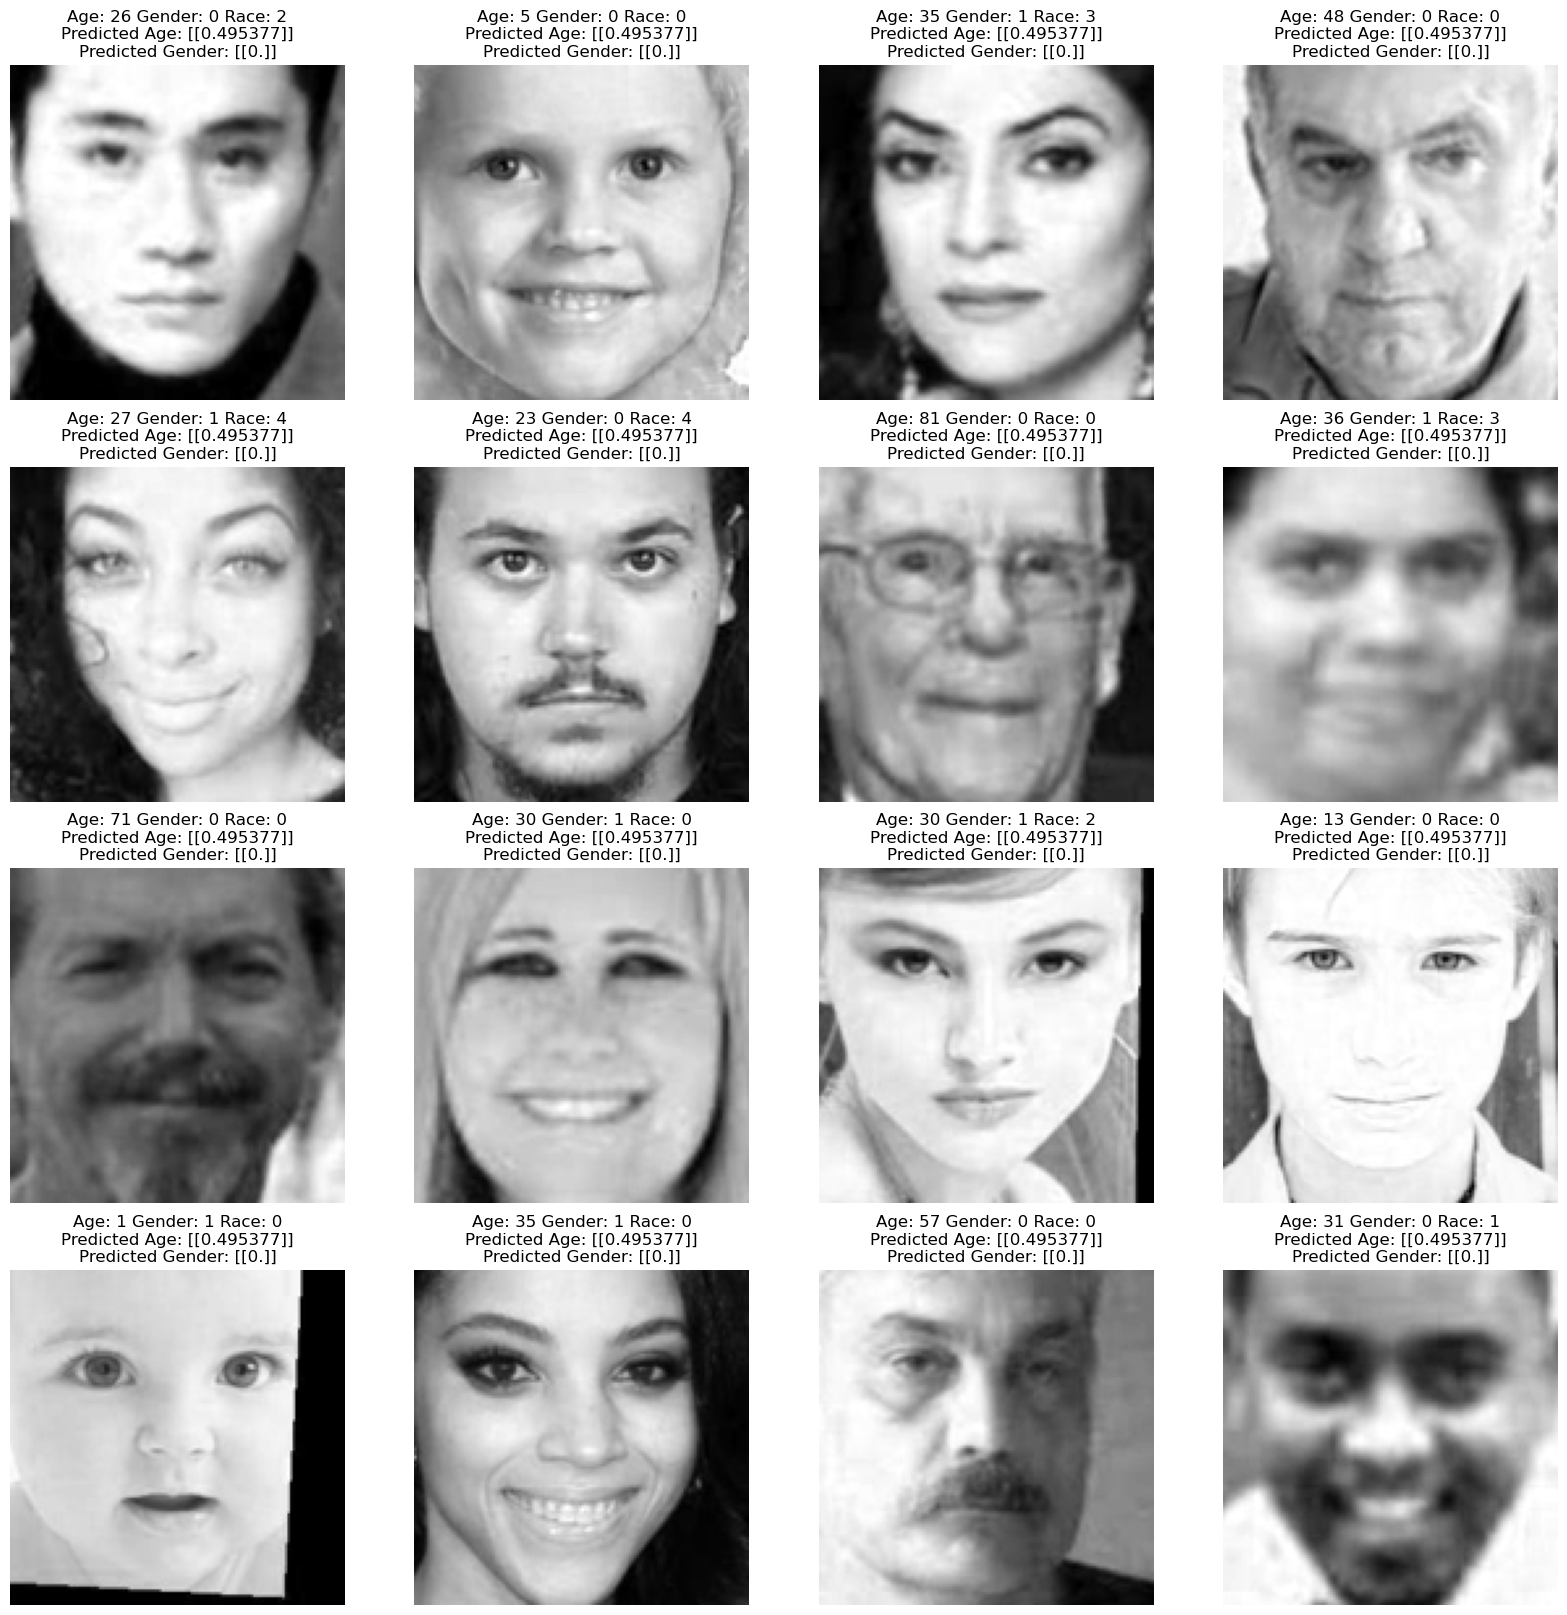

In [54]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import textwrap

plt.figure(figsize=(20, 20))
files = df.iloc[0:16]

for index, file, age, gender, race in files.itertuples():
    plt.subplot(4, 4, index+1)
    img = Image.open(file)
    img = img.resize((128, 128))
    img = np.array(img)
    img = img.reshape(1, 128, 128, 3)
    plt.imshow(img[0, :, :, 0], cmap='gray') # display grayscale image
    plt.axis('off')
    
    # Adding predictions
    prediction = model.predict(img)
    plt.title("\n".join(textwrap.wrap(f"Age: {age} Gender: {gender} Race: {race} Predicted Age: {prediction[0]} Predicted Gender: {prediction[1]}", width=30)))

  #  plt.title(f"Age: {age} Gender: {gender_dict[gender]} Race: {race}"+"Predicted Age: {prediction[0][0]} Predicted Gender: {gender_dict[np.argmax(prediction[1])]}")
plt.show()

<div style="background-color: #E6E6FA; text-align:center; padding: 10px; border-radius: 25px;">
  <h1 style="color:pink">Les étapes du CNN</h1>
</div>

Les étapes de base de la CNN sont les suivantes :

1) Convolution: la couche de convolution applique des filtres à l'image d'entrée pour extraire des caractéristiques importantes.

2) Fonction d'activation: une fonction d'activation est appliquée à chaque sortie de convolution pour ajouter de la non-linéarité au modèle.

3) Pooling: une couche de pooling réduit la dimensionnalité de l'image en prenant le maximum ou la moyenne d'une région donnée.

4) Flattening: la couche de flattening transforme la sortie de la dernière couche de convolution et de pooling en un vecteur 1D.

5) Couche complètement connectée: une ou plusieurs couches complètement connectées sont utilisées pour faire des prédictions à partir du vecteur 1D.

6) Fonction de perte: la fonction de perte mesure l'écart entre les prédictions du modèle et les valeurs réelles.

7) Optimisation: l'optimisation est utilisée pour ajuster les poids du modèle en fonction de la fonction de perte.

8) Validation: la performance du modèle est évaluée sur un ensemble de données de validation distinct de l'ensemble d'entraînement.

9) Test: la performance finale du modèle est évaluée sur un ensemble de données de test distinct de l'ensemble d'entraînement et de l'ensemble de validation.

## **La convolution 2x2** 
consiste à appliquer un filtre de taille 2x2 sur une image. Le filtre se déplace sur l'image, en multipliant chaque élément du filtre avec l'élément correspondant de l'image et en sommant les produits pour obtenir une nouvelle valeur pour le pixel central. Cela est répété pour chaque pixel de l'image, créant ainsi une nouvelle image filtrée. Ce processus permet d'extraire des caractéristiques importantes de l'image et de réduire la taille de l'image en même temps.

<img src="https://miro.medium.com/v2/resize:fit:828/1*D6iRfzDkz-sEzyjYoVZ73w.gif">


## **Les fonctions d'activations** 



| Fonction d'activation | Formule mathématique | Définition | Cas d'utilisation |
|-----------------------|---------------------|------------|--------------------|
| ReLU (Rectified Linear Unit) | $f(x) = \max(0,x)$ | Fonction qui renvoie 0 si x est négatif, et x si x est positif | Utilisée pour la classification, la régression, la détection d'objets |
| Softmax | $f_i(z) = \frac{e^{z_i}}{\sum_{j=1}^{K}e^{z_j}}$ | Fonction qui normalise une distribution de probabilité sur un ensemble de K classes | Utilisée pour la classification multi-classes |
| Sigmoid | $f(x) = \frac{1}{1+e^{-x}}$ | Fonction qui renvoie une valeur comprise entre 0 et 1 | Utilisée pour la classification binaire, la détection d'objets |



## **MaxPooling** 

MaxPooling2D est une opération de pooling qui réduit la dimensionnalité de la sortie d'une couche de convolution en prenant la valeur maximale dans chaque fenêtre de pooling. Dans ce cas, la fenêtre de pooling a une taille de 2x2. Cette opération est utilisée pour réduire le nombre de paramètres dans le modèle et pour éviter le sur-ajustement (overfitting) en réduisant le suréchantillonnage.

<center><img src="https://nico-curti.github.io/NumPyNet/NumPyNet/images/maxpool.gif"></center>


## **Flattening** 


<center><img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/flattening.png"></center>


## **Les fonctions pertes** 

| Fonction | Description | Utilisation |
|----------|-------------|-------------|
| MAE (Mean Absolute Error) | Calcule la moyenne de la valeur absolue des écarts entre la prédiction et la valeur réelle | Convient aux problèmes de régression où les valeurs cibles ont une grande variance |
| Binary Cross Entropy | Mesure la distance entre la distribution de probabilité prédite et la distribution de probabilité réelle pour un problème de classification binaire | Convient aux problèmes de classification binaire |
| Categorical Cross Entropy | Mesure la distance entre la distribution de probabilité prédite et la distribution de probabilité réelle pour un problème de classification multi-classes | Convient aux problèmes de classification multi-classes |


<div style="background-color: #E6E6FA; text-align:center; padding: 10px; border-radius: 25px;">
  <h1 style="color:pink">Modelling CNN</h1>
</div>

| Couche | Type | Nombre de filtres | Taille du noyau | Fonction d'activation |
|--------|------|------------------|----------------|----------------------|
| Input | Image (128x128x1) | - | - | - |
| Conv2D_1 | Convolutionnelle | 32 | 3x3 | ReLU |
| MaxPooling2D_1 | Pooling maximal | - | 2x2 | - |
| Conv2D_2 | Convolutionnelle | 64 | 3x3 | ReLU |
| MaxPooling2D_2 | Pooling maximal | - | 2x2 | - |
| Conv2D_3 | Convolutionnelle | 128 | 3x3 | ReLU |
| MaxPooling2D_3 | Pooling maximal | - | 2x2 | - |
| Conv2D_4 | Convolutionnelle | 256 | 3x3 | ReLU |
| MaxPooling2D_4 | Pooling maximal | - | 2x2 | - |
| Flatten | Aplatissage | - | - | - |
| Dense_1 | Entièrement connectée | 256 | - | ReLU |
| Dense_2 | Entièrement connectée | 256 | - | ReLU |
| Dense_3 | Entièrement connectée | 256 | - | ReLU |
| Dropout_1 | Couche de dropout | - | - | - |
| Dropout_2 | Couche de dropout | - | - | - |
| Dropout_3 | Couche de dropout | - | - | - |
| Gender_Out | Couche de sortie | 1 | - | Sigmoid |
| Age_Out | Couche de sortie | 1 | - | ReLU |
| Race_Out | Couche de sortie | 1 | - | Softmax |


Ce modèle est un réseau de neurones convolutionnel (CNN) à plusieurs sorties (multi-output) utilisé pour la reconnaissance de genre, l'estimation de l'âge et l'identification de la race à partir d'images faciales.

Le modèle commence par quatre couches de convolution avec des fonctions d'activation ReLU, suivies de couches de pooling max pour réduire la dimensionnalité de l'image.

Ensuite, l'entrée est aplatie avant d'être envoyée à trois couches denses, chacune suivie d'une couche de dropout pour éviter le surapprentissage.

Enfin, il y a trois couches de sortie avec différentes fonctions d'activation pour chaque tâche.

Le modèle est entraîné avec la fonction de perte binaire croisée pour la sortie du genre, la perte de moyenne absolue pour la sortie de l'âge et la perte de la log-vraisemblance catégorielle pour la sortie de la race.

Le modèle est optimisé avec l'algorithme Adam et évalué sur la précision (accuracy) pour chaque sortie.

les hyperparametres sont : 
- kernel_size : taille des noyaux de convolution, qui est fixée à (3, 3).

- batch_size : taille de lot, qui est fixée à 32.

- epochs : nombre d'epochs pour l'entraînement, qui est fixé à 10.

- dropout_rate : taux de dropout pour les couches entièrement connectées, qui est fixé à 0,3.

- optimizer : l'optimiseur Adam est utilisé pour optimiser la fonction de perte.

- loss : la perte binaire_crossentropy est utilisée pour la prédiction de genre et la perte mae est utilisée pour la prédiction d'âge.

In [ ]:
#njarrb
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # ignore this step if using RGB
    features = features.reshape(len(features), 128, 128, 1)
    return features
X = extract_features(df['image'])
input_shape=(128,128,1)
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)
dense_3 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)
dropout_3 = Dropout(0.3) (dense_3)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)
output_3 = Dense(1, activation='softmax', name='race_out') (dropout_3)


model = Model(inputs=[inputs], outputs=[output_1, output_2,output_3])

model.compile(loss=['binary_crossentropy', 'mae', 'categorical_crossentropy'], optimizer='adam', metrics=['accuracy'])
# train model

#history = model.fit(x=X, y=[y_gender, y_age,y_race], batch_size=32, epochs=1, validation_split=0.2)




In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 126, 126, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 63, 63, 32)   0           ['conv2d[0][0]']                 
                                                                                              

*Conv2D* paramètres1 = (taille du noyau de convolution * nombre de canaux d'entrée + 1) * nombre de filtres = (3*3*1+1)*32 = 320

*Conv2D_1* : la première couche de convolution (conv2d) a une sortie de dimension (126, 126, 32), qui est l'entrée de la deuxième couche de convolution (conv2d_1). La deuxième couche de convolution utilise 64 filtres de taille 3x3 et une fonction d'activation ReLU, ce qui donne un total de 64x(3x3x32+1) = 18496 paramètres. Les "+1" correspondent au biais de chaque filtre.

*Le paramètre conv2d_1* est déterminé par le nombre de filtres de convolution de la couche, qui est 64. Chaque filtre de convolution a une dimension de 3x3, donc le nombre total de poids de cette couche est de 64 * 3 * 3 * 32 + 64 = 18496, où 32 est le nombre de canaux de la sortie de la couche précédente.

*Le paramètre conv2d_2* est déterminé de la même manière, mais avec 128 filtres de convolution, ce qui donne un nombre total de poids de 128 * 3 * 3 * 64 + 128 = 73 856, où 64 est le nombre de canaux de sortie de la couche précédente.

*Le paramètre conv2d_3* est également déterminé de la même manière, mais avec 256 filtres de convolution, ce qui donne un nombre total de poids de 256 * 3 * 3 * 128 + 256 = 2 951 68, où 128 est le nombre de canaux de sortie de la couche précédente.

*Le paramètre dense* correspond à la couche de neurones entièrement connectée avec 256 neurones, qui prend en entrée la sortie de la couche flatten. Le nombre de poids est calculé comme (nombre d'entrées) * (nombre de neurones) + (nombre de neurones) = 9 216 * 256 + 256 = 2 359 552.

*Les autres couches dense_1 et dense_2* sont également des couches de neurones entièrement connectées avec 256 neurones chacune, et les poids sont calculés de la même manière que dense.

*Les couches dropout* sont des couches de régularisation qui appliquent une probabilité de mise à zéro à chaque neurone d'entrée. Elles ne contiennent pas de paramètres à optimiser.

Enfin, chaque couche de sortie (gender_out, age_out, race_out) est une couche dense avec une sortie unique qui prédit la sortie correspondante. Elle a donc un poids pour chaque entrée de la couche précédente, plus un biais. Dans ce cas, chaque couche de sortie a 256 entrées (correspondant au nombre de neurones de la couche dense), donc le nombre total de poids pour chaque couche de sortie est de 256 + 1 = 257.



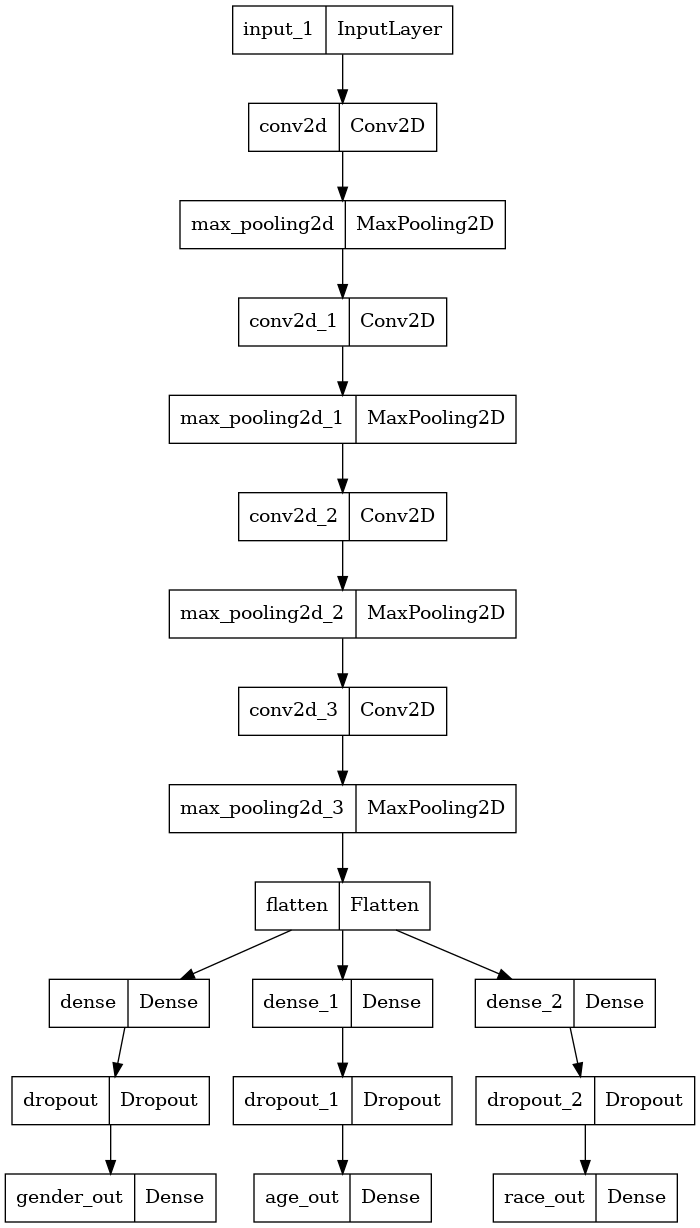

In [13]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [27]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train_val, X_test, y_gender_train_val, y_gender_test, y_age_train_val, y_age_test, y_race_train_val, y_race_test = train_test_split(X, y_gender, y_age, y_race)

# Split the training and validation sets
X_train, X_val, y_gender_train, y_gender_val, y_age_train, y_age_val, y_race_train, y_race_val = train_test_split(X_train_val, y_gender_train_val, y_age_train_val, y_race_train_val)
history_2 = model.fit(x=X_train, y=[y_gender_train, y_age_train, y_race_train], batch_size=32, epochs=10, validation_data=(X_val, [y_gender_val, y_age_val, y_race_val]))


  0%|          | 0/10000 [00:00<?, ?it/s]

Epoch 1/10
176/176 [==============================] - 132s 742ms/step - loss: 20.2241 - gender_out_loss: 2.1208 - age_out_loss: 18.1033 - gender_out_accuracy: 0.6123 - age_out_accuracy: 0.0466 - race_out_accuracy: 0.1836 - val_loss: 16.6663 - val_gender_out_loss: 0.5244 - val_age_out_loss: 16.1419 - val_gender_out_accuracy: 0.7499 - val_age_out_accuracy: 0.0565 - val_race_out_accuracy: 0.1989
Epoch 2/10
176/176 [==============================] - 125s 707ms/step - loss: 13.6658 - gender_out_loss: 0.5084 - age_out_loss: 13.1574 - gender_out_accuracy: 0.7564 - age_out_accuracy: 0.0428 - race_out_accuracy: 0.1836 - val_loss: 14.7143 - val_gender_out_loss: 0.4977 - val_age_out_loss: 14.2166 - val_gender_out_accuracy: 0.7611 - val_age_out_accuracy: 0.0240 - val_race_out_accuracy: 0.1989
Epoch 3/10
176/176 [==============================] - 125s 709ms/step - loss: 12.2654 - gender_out_loss: 0.4704 - age_out_loss: 11.7950 - gender_out_accuracy: 0.7769 - age_out_accuracy: 0.0286 - race_out_accu

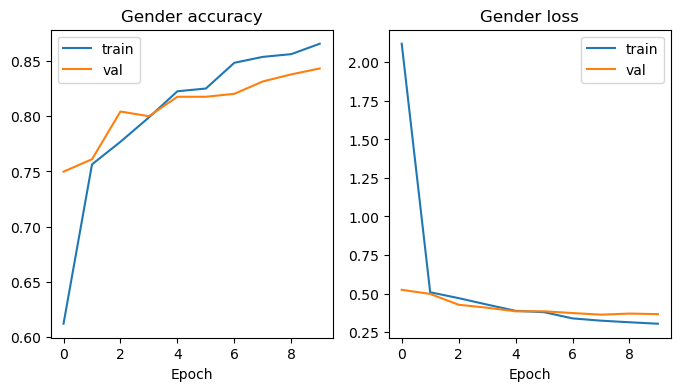

In [40]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history_2.history['gender_out_accuracy'], label='train')
plt.plot(history_2.history['val_gender_out_accuracy'], label='val')
plt.title('Gender accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_2.history['gender_out_loss'], label='train')
plt.plot(history_2.history['val_gender_out_loss'], label='val')
plt.title('Gender loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [28]:
model.save('model_cnn_10000_2l.h5')

In [36]:
test_metrics = model.evaluate(X_test, [y_gender_test, y_age_test, y_race_test])
print("Test loss:", test_metrics[0])
print("Test gender loss:", test_metrics[1])
print("Test age loss:", test_metrics[2])
print("gender out accuracy:", test_metrics[3]*100)
print("age out accuracy:", test_metrics[4])
print("race out accuracy:", test_metrics[5])


79/79 [==============================] - 13s 170ms/step - loss: 8.6906 - gender_out_loss: 0.3482 - age_out_loss: 8.3425 - gender_out_accuracy: 0.8504 - age_out_accuracy: 0.0068 - race_out_accuracy: 0.1880
Test loss: 8.690649032592773
Test gender loss: 0.3481762111186981
Test age loss: 8.342473030090332
gender out accuracy: 85.03999710083008
age out accuracy: 0.006800000090152025
race out accuracy: 0.18799999356269836


Original Gender: Male Original Age: 47
1/1 [==============================] - 0s 204ms/step
Predicted Gender: Male Predicted Age: 33


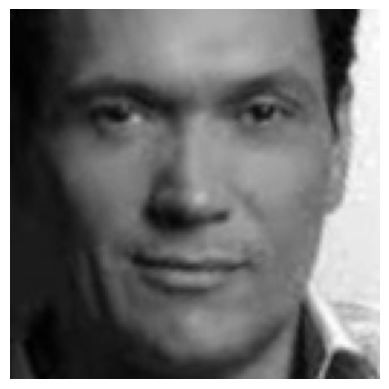

In [41]:
image_index = 10
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

1/1 [==============================] - 0s 138ms/step
Predicted Gender: Male
Predicted Age: 15
Predicted Race: 1


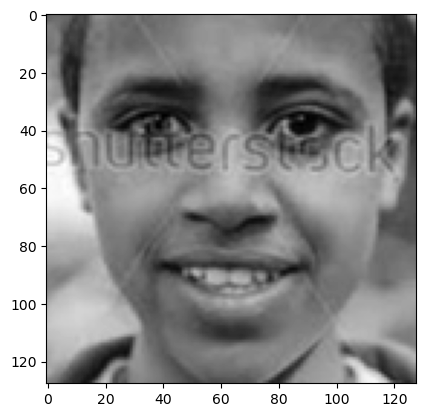

In [108]:
from keras.models import load_model

# Load the saved model
loaded_model = load_model('my_model.h5')

# Make predictions on new data
pred_gender, pred_age, pred_race = loaded_model.predict(X[image_index].reshape(1, 128, 128, 1))

# Print the predicted gender, age, and race
print("Predicted Gender:", gender_dict[round(pred_gender[0][0])])
print("Predicted Age:", round(pred_age[0][0]))
print("Predicted Race:", race_dict[round(pred_race[0][0])])
plt.imshow(X[image_index].reshape(128, 128), cmap='gray')


## run the model on all data


In [43]:
#run the model on all data
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # ignore this step if using RGB
    features = features.reshape(len(features), 128, 128, 1)
    return features
X = extract_features(df['image'])
input_shape=(128,128,1)
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)
dense_3 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)
dropout_3 = Dropout(0.3) (dense_3)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)
output_3 = Dense(1, activation='softmax', name='race_out') (dropout_3)


model = Model(inputs=[inputs], outputs=[output_1, output_2,output_3])

model.compile(loss=['binary_crossentropy', 'mae', 'categorical_crossentropy'], optimizer='adam', metrics=['accuracy'])
# train model

#history = model.fit(x=X, y=[y_gender, y_age,y_race], batch_size=32, epochs=1, validation_split=0.2)




from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train_val, X_test, y_gender_train_val, y_gender_test, y_age_train_val, y_age_test, y_race_train_val, y_race_test = train_test_split(X, y_gender, y_age, y_race)

# Split the training and validation sets
X_train, X_val, y_gender_train, y_gender_val, y_age_train, y_age_val, y_race_train, y_race_val = train_test_split(X_train_val, y_gender_train_val, y_age_train_val, y_race_train_val)
history_2 = model.fit(x=X_train, y=[y_gender_train, y_age_train, y_race_train], batch_size=32, epochs=10, validation_data=(X_val, [y_gender_val, y_age_val, y_race_val]))


Epoch 1/10
417/417 [==============================] - 294s 703ms/step - loss: 34.7013 - gender_out_loss: 0.9043 - age_out_loss: 33.7970 - gender_out_accuracy: 0.7388 - age_out_accuracy: 3.0001e-04 - race_out_accuracy: 0.1889 - val_loss: 34.2564 - val_gender_out_loss: 0.3713 - val_age_out_loss: 33.8850 - val_gender_out_accuracy: 0.8326 - val_age_out_accuracy: 0.0000e+00 - val_race_out_accuracy: 0.1935
Epoch 2/10
417/417 [==============================] - 293s 703ms/step - loss: 33.4943 - gender_out_loss: 0.3770 - age_out_loss: 33.1173 - gender_out_accuracy: 0.8300 - age_out_accuracy: 0.0000e+00 - race_out_accuracy: 0.1889 - val_loss: 34.2108 - val_gender_out_loss: 0.3257 - val_age_out_loss: 33.8850 - val_gender_out_accuracy: 0.8540 - val_age_out_accuracy: 0.0000e+00 - val_race_out_accuracy: 0.1935
Epoch 3/10
417/417 [==============================] - 293s 703ms/step - loss: 33.4505 - gender_out_loss: 0.3332 - age_out_loss: 33.1173 - gender_out_accuracy: 0.8483 - age_out_accuracy: 0.0000

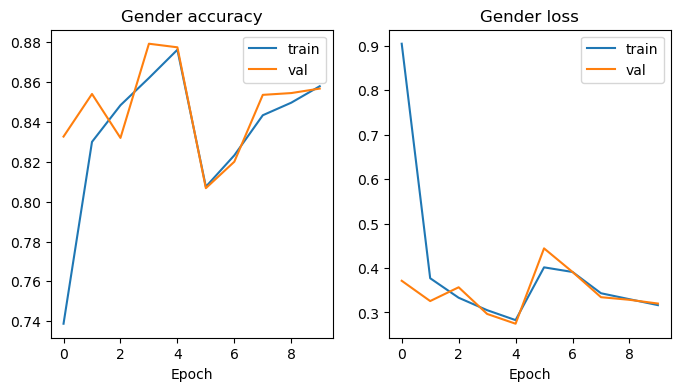

In [44]:
import matplotlib.pyplot as plt

# Plot gender accuracy and loss
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history_2.history['gender_out_accuracy'], label='train')
plt.plot(history_2.history['val_gender_out_accuracy'], label='val')
plt.title('Gender accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_2.history['gender_out_loss'], label='train')
plt.plot(history_2.history['val_gender_out_loss'], label='val')
plt.title('Gender loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()




In [45]:
test_metrics = model.evaluate(X_test, [y_gender_test, y_age_test, y_race_test])
print("Test loss:", test_metrics[0])
print("Test gender loss:", test_metrics[1])
print("Test age loss:", test_metrics[2])
print("gender out accuracy:", test_metrics[3]*100)
print("age out accuracy:", test_metrics[4])
print("race out accuracy:", test_metrics[5])


186/186 [==============================] - 32s 174ms/step - loss: 8.0454 - gender_out_loss: 0.3383 - age_out_loss: 7.7071 - gender_out_accuracy: 0.8512 - age_out_accuracy: 0.0061 - race_out_accuracy: 0.1937
Test loss: 8.04535961151123
Test gender loss: 0.3382706642150879
Test age loss: 7.707089900970459
gender out accuracy: 85.11894941329956
age out accuracy: 0.0060738991014659405
race out accuracy: 0.19368989765644073


1/1 [==============================] - 0s 31ms/step
Predicted Gender: Male Predicted Age: 29 Predicted Race: 1


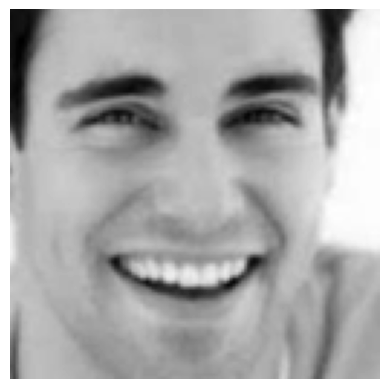

In [58]:
image_index = 2
#print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index],"Original Race:", y_race[image_index])
# predict from model
pred = model.predict(X_test[2].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
pred_race = round(pred[2][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age,"Predicted Race:", pred_race)
plt.axis('off')
plt.imshow(X_test[2].reshape(128, 128), cmap='gray');

Original Gender: Female Original Age: 6
1/1 [==============================] - 0s 43ms/step
Predicted Gender: Female
Predicted Age: 0
Predicted Race: 1


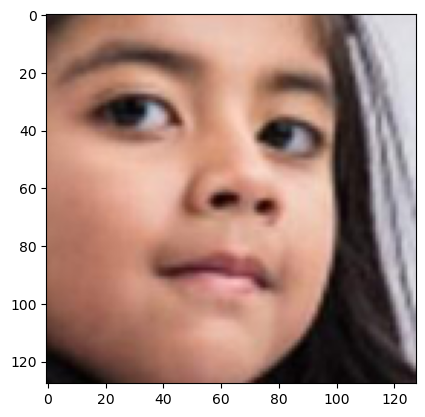

In [43]:
from keras.models import load_model

# Load the saved model
image_index=300
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])

# Make predictions on new data
pred_gender, pred_age, pred_race = model.predict(X[image_index].reshape(1, 128, 128, 3))

# Print the predicted gender, age, and race
print("Predicted Gender:", gender_dict[round(pred_gender[0][0])])
print("Predicted Age:", round(pred_age[0][0]))
print("Predicted Race:", race_dict[round(pred_race[0][0])])
plt.imshow(X[image_index].reshape(128, 128,3), cmap='gray')
